# Primer on Supervised Learning

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# General Supervised Classification

## Problem Setup

Let $X = \{x_1,\ldots,x_N\}$ be a collection of vectors in $\mathbb{R}^d$, and assume that each vector $x_i$ comes with a *label* $y_i \in \{0,1\}$. Let $y = \{y_1,\ldots,y_N\}$ denote the set of labels.

**Example:** Each $x_i$ could be a greyscale image of size $m \times n$ pixels. Then we can consider $x_i$ as a vector in $\mathbb{R}^m \times \mathbb{R}^n \approx \mathbb{R}^{mn}$ (so $d = mn$). Suppose that the dataset consists of pictures of *dogs* (label 0) and *cats* (label 1). 

**Goal:** Train a classifier to automatically determine if an element of $\mathbb{R}^d$ belongs to class 0 or class 1.

## Supervised Learning Approach

We fix a finite-dimensional class of functions $\mathcal{F}$ of the form $f:\mathbb{R}^d \to [0,1]$. Usually, $\mathcal{F}$ is *parameterized* by $\mathbb{R}^n$; that is, for a selection of parameters $\theta \in \mathbb{R}^n$, there is a function $f_\theta \in \mathcal{F}$ which is determined by these parameters.

We think of each function $f_\theta$ as a *classifier*: given $x \in \mathbb{R}^d$, 
- if $f_\theta(x) \leq 0.5$, then $x$ is classified as class 0,
- if $f_\theta(x) > 0.5$, then $x$ is classified as class 1.

Our task is to find the *best* choice of parameters; that is, the choice $\theta \in \mathbb{R}^n$ giving a classifier $f_\theta$ with the best performance. The question is: **how do we measure performance of a classifier**?

### Quantifying Classifer Performance

We typically choose a subset (the **training set**) of our data $X_{train} \subset X$, $y_{train} \subset y$. 

Next we choose a **loss function** $L:\mathbb{R}^n \to \mathbb{R}_{\geq 0}$ from the parameter space to $\mathbb{R}$. The loss function is typically of the form
$$
L(\theta) = \sum_{(x_i,y_i) \in X_{train} \times y_{train}} \ell(\theta,x_i,y_i),
$$
and should qualitatively have the properties:
- if $\theta$ leads to a classifier $f_\theta$ which typically gives the **correct** classification on the training set, then $L(\theta)$ should be **small**
- if $\theta$ leads to a classifier $f_\theta$ which typically gives the **incorrect** classification on the training set, then $L(\theta)$ should be **large**

Then we can refine our **Goal:** minimize $L(\theta)$ over $\theta$. 

## Example: Logistic Regression

Consider **parameters** of the form $\theta = (\theta_1,\ldots,\theta_d,\theta_{d+1}) \in \mathbb{R}^{d+1}$ (so $n = d+1$ in this example).

The **classification function** corresponding to $\theta$ is 
$$
f_\theta(x) = \frac{1}{1 + \exp(-(\langle (\theta_1,\ldots,\theta_d), x \rangle + \theta_{d+1}))}
$$
Geometrically, $f_\theta(x)$ is:
- close to zero (i.e., predicts class 0) when $\langle (\theta_1,\ldots,\theta_d), x \rangle + \theta_{d+1} < 0$
- close to one (i.e., predicts class 1) when $\langle (\theta_1,\ldots,\theta_d), x \rangle + \theta_{d+1} > 0$.

The two cases correspond to which "side" $x$ falls on, with respect to the affine hyperplane $\theta_1 x_1 + \cdots + \theta_d x_d + \theta_{d+1} = 0$. 

The **loss function** is 
$$
L(\theta) = - \sum_{(x_i,y_i)} \big(y_i \log (f_\theta(x_i)) + (1-y_i) \log(1-f_\theta(x_i)) \big)
$$
The summand 
$$
\ell(\theta,x,y) = -\big(y \log(f_\theta(x)) + (1-y) \log(1-f_\theta(x))\big)
$$
has the properties that:
- if $y=0$ and $f_\theta(x)$ is close to zero, $\ell(\theta,x,y)$ is small
- if $y=0$ and $f_\theta(x)$ is close to one, $\ell(\theta,x,y)$ is big
- if $y=1$ and $f_\theta(x)$ is close to zero, $\ell(\theta,x,y)$ is big
- if $y=1$ and $f_\theta(x)$ is close to one, $\ell(\theta,x,y)$ is small.

## Logistic Regression in Practice

Let's run logistic regression on a real dataset.

We'll use a shrunken down version of the classic MNIST dataset, consisting of many samples of handwritten digits.

In [3]:
from sklearn import datasets
digits = datasets.load_digits()

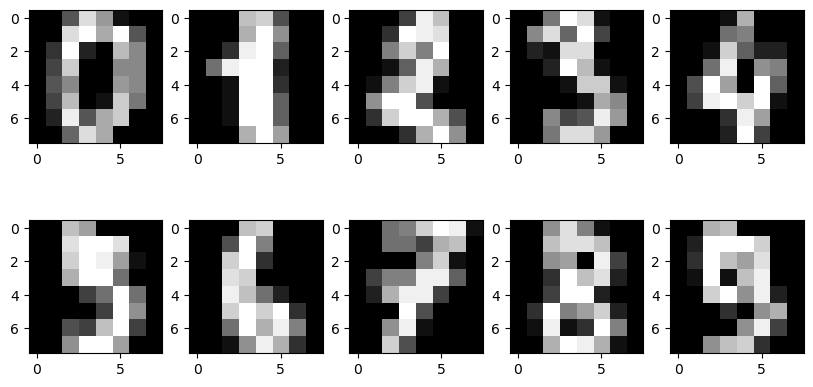

In [70]:
fig = plt.figure(figsize=(10,5))

for j in range(10):
    fig.add_subplot(2,5,j+1)
    plt.imshow(digits.images[j], cmap='gray')

plt.show()

Let's construct a dataset consisting of only the 0's and 1's.

(Logistic regression (and other supervised classification problems) can handle more than two classes, but let's keep it simple to illustrate the idea here.)

We'll also split off part of the data as a training set. We keep the rest as a **test set**, to test our model. 

In [71]:
from sklearn.model_selection import train_test_split

MNIST = digits.data
MNISTlabels = digits.target

X = np.vstack((MNIST[MNISTlabels==0],MNIST[MNISTlabels==1]))
y = np.hstack((MNISTlabels[MNISTlabels==0],MNISTlabels[MNISTlabels==1]))

X_train, X_test, y_train, y_test = train_test_split(X, y)

Optimizing the parameters $\theta$ in logistic regression is handled by the following code.

In [72]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression(solver='lbfgs', max_iter=10000)
model.fit(X_train, y_train)

LogisticRegression(max_iter=10000)

We can see the optimal parameters below.

In [73]:
model.coef_

array([[ 0.00000000e+00,  3.53303190e-04,  1.45438906e-02,
        -5.44468068e-02, -2.04315849e-02,  1.66560956e-01,
         6.47524683e-02,  0.00000000e+00,  0.00000000e+00,
         7.99173272e-03, -2.89146327e-02, -4.53702256e-02,
         7.63509996e-02, -1.38797997e-03,  3.62699692e-02,
         0.00000000e+00,  7.60747775e-03,  4.37139199e-02,
        -2.48446431e-02,  1.61074256e-01,  2.39059793e-01,
        -8.58299199e-02,  2.65638887e-03,  0.00000000e+00,
         3.80373887e-03,  6.70777385e-03, -7.03238287e-03,
         1.45839383e-01,  1.85686685e-01, -5.23412621e-02,
        -6.61753396e-02,  0.00000000e+00,  0.00000000e+00,
        -8.01334502e-02, -1.19551590e-01,  1.63379615e-01,
         1.53209074e-01, -5.27843282e-02, -9.05792761e-02,
         0.00000000e+00,  0.00000000e+00, -3.69026348e-02,
        -1.61412114e-01,  1.04882258e-01,  5.19172403e-02,
        -8.11851461e-02, -8.93960758e-02,  0.00000000e+00,
         0.00000000e+00, -8.19717880e-03, -9.56159515e-0

The coefficients above give $\theta_1,\ldots,\theta_d$. We can see this by looking at the shape of the coefficients vector.

In [76]:
model.coef_.shape

(1, 64)

The last parameter $\theta_{d+1}$ is stored in the `intercept` attribute.

In [77]:
model.intercept_

array([0.01375909])

Now we can use the trained model to predict classes of the digits from our testing set. Let's take a look at how it performs, qualitatively.

In [78]:
X_predicted = model.predict(X_test)

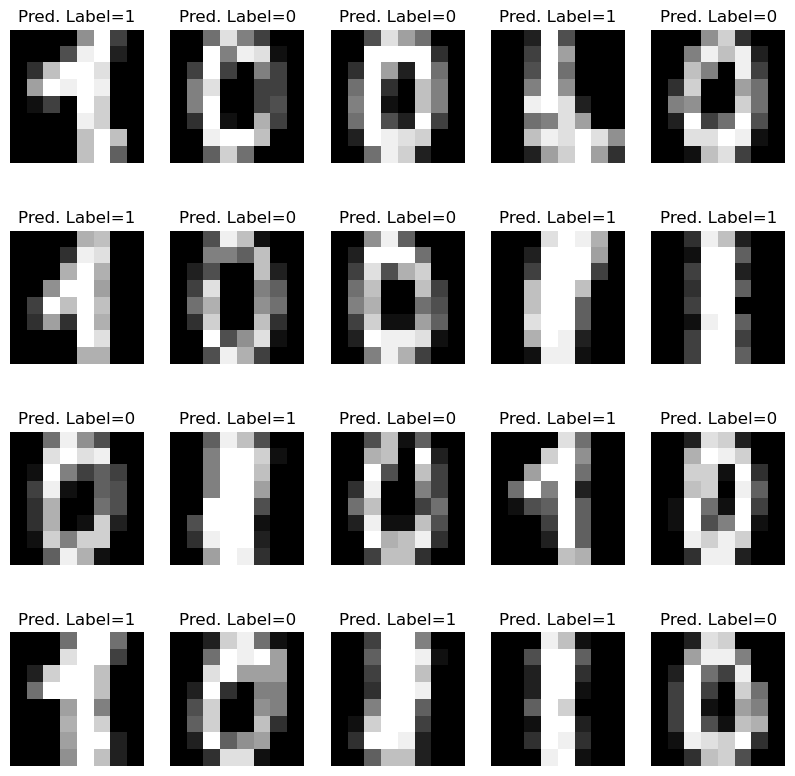

In [79]:
fig = plt.figure(figsize=(10,10))

for j in range(20):
    fig.add_subplot(4,5,j+1)
    plt.imshow(X_test[j].reshape(8,8), cmap='gray')
    plt.axis('off')
    plt.title('Pred. Label='+str(X_predicted[j]))

plt.show()

Quantitatively, the model performs very well.

In [80]:
print('Prediction Accuracy:',np.round(model.score(X_test,y_test),2))

Prediction Accuracy: 1.0


## Low-Dimensional Version

Let's project everything down to 2 dimensions using PCA so that we can see what's going on.

In [81]:
from sklearn.decomposition import PCA

We'll find the best 2-dimensional representation of $X$ (which naturally lives in 64 dimensions) via a PCA projection.

In [82]:
pca = PCA(n_components=2)
X_proj = pca.fit_transform(X) # Solves the PCA problem for our dataset X

Here's a picture of the projected dataset.

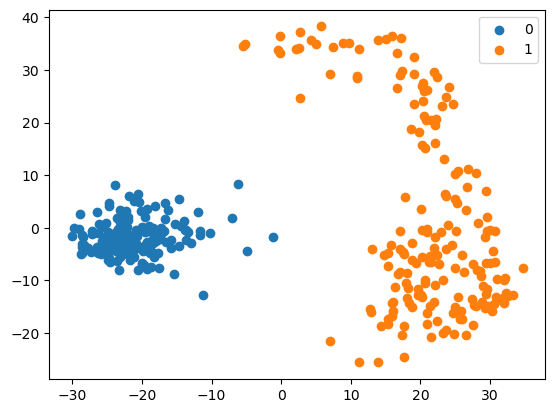

In [83]:
num_zeros = np.sum(y==0)

plt.scatter(X_proj[:num_zeros,0],X_proj[:num_zeros,1],label='0')
plt.scatter(X_proj[num_zeros:,0],X_proj[num_zeros:,1],label = '1')
plt.legend()
plt.show()

We can run logistic regression on the 2d dataset. Let's first do a train/test split.

In [86]:
X_proj_train, X_proj_test, y_train, y_test = train_test_split(X_proj,y)

We now re-fit the model to the 2d data.

In [87]:
model.fit(X_proj_train, y_train)

LogisticRegression(max_iter=10000)

The coefficients are as follows.

In [88]:
model.coef_

array([[0.74315572, 0.25518024]])

In [89]:
model.intercept_

array([-1.49097662])

We can plot the affine hyperplane which optimally separates the data.

The first plot shows the separation of the training set.

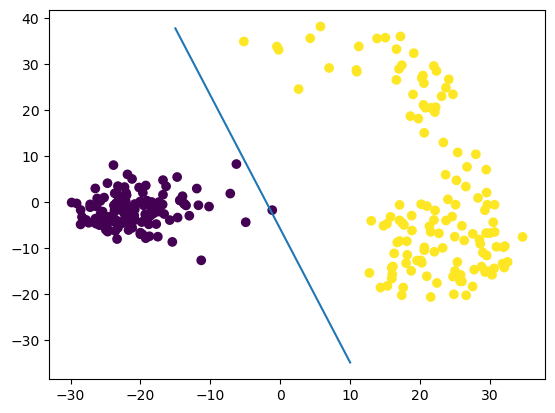

In [111]:
xs = np.linspace(-15,10,100)
a = model.coef_[0][0]
b = model.coef_[0][1]
c = model.intercept_[0]
ys = [c/b - a/b*x for x in xs]

plt.scatter(X_proj_train[:,0],X_proj_train[:,1], c = y_train)
plt.plot(xs,ys)
plt.show()

Now let's look at the separation of the testing set.

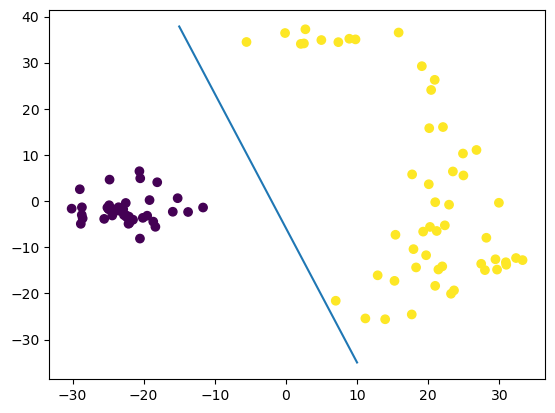

In [112]:
plt.scatter(X_proj_test[:,0],X_proj_test[:,1], c = y_test)
plt.plot(xs,ys)
plt.show()